In [1]:
from google.colab import drive
drive.mount('/gdrive')

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing import image

Mounted at /gdrive
2.8.0


In [2]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
model = tf.keras.models.load_model('/gdrive/MyDrive/transfer.h5')

# 모델 구조를 출력합니다
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [3]:
model.layers[0].input_shape

[(None, 160, 160, 3)]

In [4]:
IMG_SIZE = 160

class_names = ['cat', 'dog']

245760/229955 [================================] - 0s 0us/step


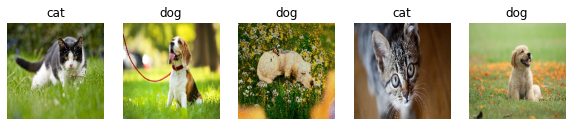

In [5]:
plt.figure(figsize=(10, 10))

for i, image_url in enumerate([
  'https://images.immediate.co.uk/production/volatile/sites/23/2014/10/GettyImages-172050389-8ab8710.jpg',
  'https://www.zooplus.ie/magazine/wp-content/uploads/2020/01/Female-Dogs-in-Heat-IE-1024x683.jpeg',
  'https://static01.nyt.com/images/2021/11/16/well/11Well-NL-DOG-SLEEP/11Well-NL-DOG-SLEEP-superJumbo.jpg',
  'https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png',
  'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg'
]):
  image_path = tf.keras.utils.get_file('Court', origin=image_url)
  img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
  os.remove(image_path) # Remove the cached file

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)

  # Apply a sigmoid since our model returns logits
  preds = tf.nn.sigmoid(preds)
  preds = tf.where(preds < 0.5, 0, 1)
  preds = preds[0][0]

  ax = plt.subplot(1, 5, i + 1)
  plt.title(class_names[preds])
  plt.imshow(img)
  plt.axis("off")